# LASSO Regularized Regression using the Homotopy Method: Visualization and Explanation

## LASSO Regularized Regression using the Homotopy Method

The **Least Absolute Shrinkage and Selection Operator (LASSO)** is a popular regression technique that not only performs regression but simultaneously selects relevant features through sparsity in its solutions.

The LASSO regression problem can be formulated as

$$
\min_{\theta} \frac{1}{2}\|X\theta - y\|_2^2 + μ\|\theta\|_1
$$

- \( X \) is the feature matrix.
- \( y \) is the target vector.
- \( μ \) controls the amount of regularization.

### Why use the Homotopy method?
The **Homotopy method** provides an efficient, incremental solution, particularly beneficial when new data points are observed sequentially. The model updates its parameters efficiently by moving continuously through solution paths (homotopies).
on paths (homotopies).


In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from model.LassoHomotopy import LassoHomotopyModel
np.random.seed(42)

##  Generate Synthetic Dataset

In [3]:
X = np.random.randn(100, 10)
true_coeffs = np.array([2.5, 0, 0, 0, -1.5, 0, 0, 0, 0, 3.0])
y = X @ true_coeffs + np.random.randn(100) * 0.1

print("True coefficients:", true_coeffs)

True coefficients: [ 2.5  0.   0.   0.  -1.5  0.   0.   0.   0.   3. ]


##  Fitting the LASSO Homotopy Model

In [4]:
# Fit the model
model = LassoHomotopyModel(reg_param=0.1)
results = model.fit(X, y)

# Display estimated coefficients
print("Estimated coefficients:", results.coefficients)

Estimated coefficients: [ 2.35945575  0.          0.          0.         -1.41220528  0.
  0.          0.          0.          2.88674429]


##  Visualizing True vs Estimated Coefficients

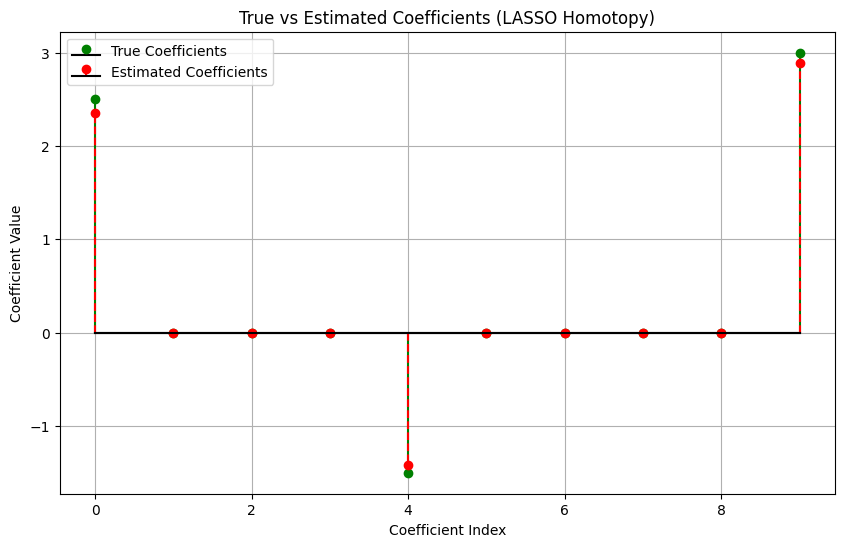

In [5]:
plt.figure(figsize=(10, 6))
plt.stem(true_coeffs, markerfmt='go', linefmt='g-', basefmt='k-', label="True Coefficients")
plt.stem(results.coefficients, markerfmt='ro', linefmt='r--', basefmt='k-', label="Estimated Coefficients")
plt.title("True vs Estimated Coefficients (LASSO Homotopy)")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

### Interpretation of Sparsity

- The green points represent **true underlying coefficients** used to generate the data.
- The red points show the **coefficients estimated by the LASSO Homotopy modeltice:
- The LASSO algorithm successfully identifies irrelevant features and sets their coefficients to zero.
- Sparsity simplifies interpretation and highlights truly influential features.


##  Visualizing Prediction Accuracy

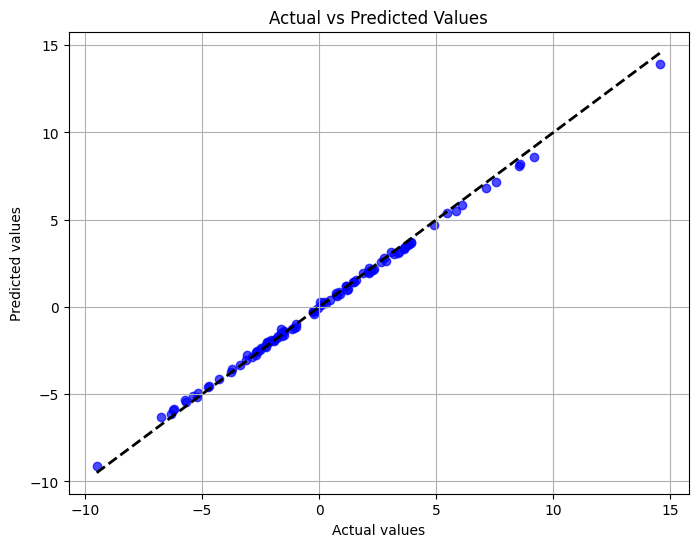

In [6]:
y_pred = results.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

## Incremental Updates (Homotopy Visualization)

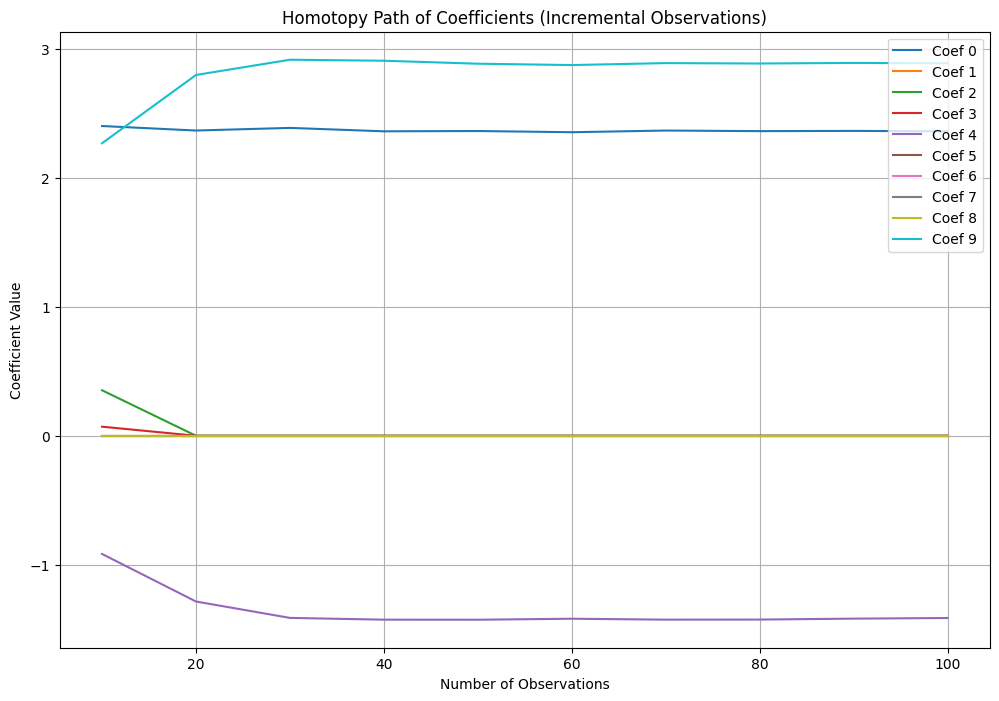

In [7]:
coeff_history = []

# Fit incrementally
for i in range(10, 101, 10):
    model_partial = LassoHomotopyModel(reg_param=0.1)
    partial_result = model_partial.fit(X[:i], y[:i])
    coeff_history.append(partial_result.coefficients)

coeff_history = np.array(coeff_history)

plt.figure(figsize=(12, 8))
for coef_idx in range(10):
    plt.plot(range(10, 101, 10), coeff_history[:, coef_idx], label=f"Coef {coef_idx}")
plt.xlabel("Number of Observations")
plt.ylabel("Coefficient Value")
plt.title("Homotopy Path of Coefficients (Incremental Observations)")
plt.legend()
plt.grid(True)
plt.show()

### Incremental Observations Interpretation

- This plot visualizes how the **Homotopy method incrementally updates coefficient estimates** as new data points are observed.
- Stability in lines indicates robustness; sharp jumps highlight the entry or exit of features from the active set.
- Such visualization provides insights into **feature importance and stability** over incremental learning.

### LASSO vs OLS Coefficient Comparison


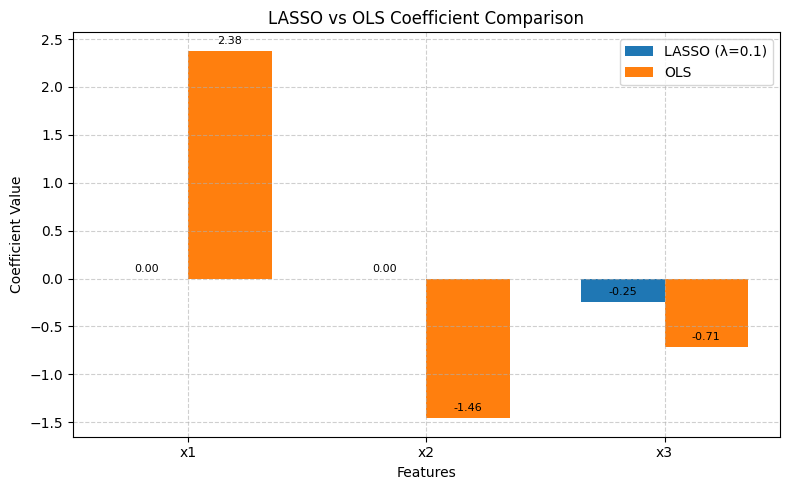

In [8]:
# Load dataset
df = pd.read_csv("../datasets/collinear_dataset.csv")
X = df[['x_1', 'x_2', 'x_3']].values
y = df['y'].values.reshape(-1, 1)

# Fit LASSO using Homotopy
lasso = LassoHomotopyModel(reg_param=0.1)
lasso_result = lasso.fit(X, y)
lasso_coefs = lasso_result.coefficients

# Fit OLS (Linear Regression without regularization)
ols = LinearRegression()
ols.fit(X, y)
ols_coefs = ols.coef_.flatten()

# Plot side-by-side coefficient comparison
labels = ['x1', 'x2', 'x3']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, lasso_coefs, width, label='LASSO (λ=0.1)', color='tab:blue')
bars2 = ax.bar(x + width/2, ols_coefs, width, label='OLS', color='tab:orange')

# Labels and styling
ax.set_ylabel('Coefficient Value')
ax.set_xlabel('Features')
ax.set_title('LASSO vs OLS Coefficient Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Display value on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In this plot, we compare the learned coefficients from the **LASSO regression model** against those from **Ordinary Least Squares (OLS)** using a highly collinear dataset (`collinear_dataset.csv`) that we generated.

- **OLS** assigns non-zero weights to all features, even redundant ones.
- **LASSO**, due to its L1 regularization, drives many coefficients to exactly zero, promoting sparsity and effectively performing feature selection.

This comparison visually demonstrates LASSO's ability to identify and ignore redundant features, making it especially useful for **high-dimensional or multicollinear datasets**.

### LASSO Predictions vs Actual Values

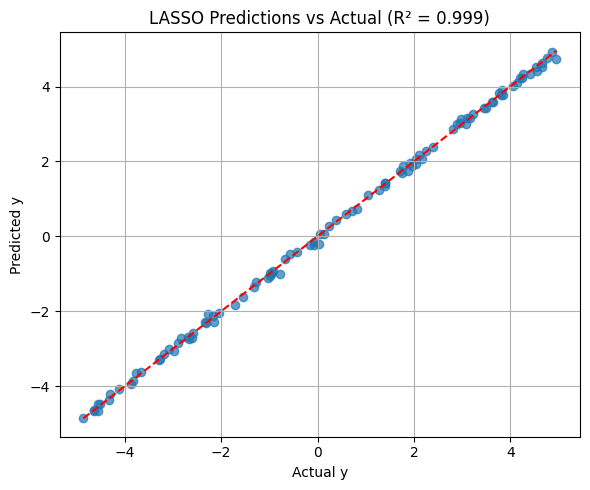

In [9]:
y_pred = lasso_result.predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title(f"LASSO Predictions vs Actual (R² = {lasso_result.r2_score(y, y_pred):.3f})")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()



This scatter plot shows the **predicted values** from the LASSO model versus the **actual target values** from our dataset. The red dashed line represents the ideal `y = ŷ` scenario (perfect predictions).

- A near-perfect alignment of points along the red line indicates that the LASSO model fits the data extremely well.
- The **R² score** displayed in the title quantifies this goodness-of-fit, where a score close to 1 indicates a strong correlation between predicted and actual values.

This visualization provides a clear indication of the model's **predictive performance**.

### LASSO Residuals Plot

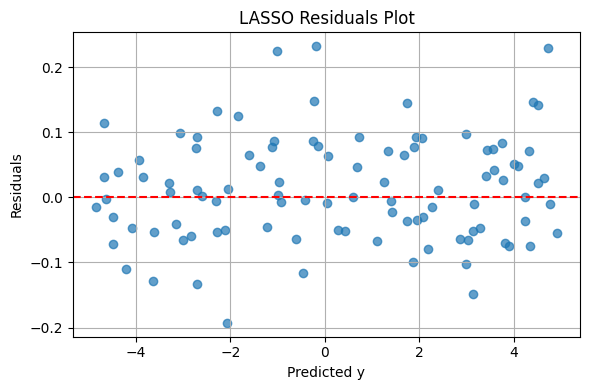

In [10]:
residuals = y - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted y")
plt.ylabel("Residuals")
plt.title("LASSO Residuals Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

This plot displays the **residuals** (errors) of the LASSO model's predictions versus the predicted values.

- Residuals are calculated as `y - ŷ`.
- Ideally, residuals should be **randomly scattered** around the zero line, with no discernible pattern.

Such a distribution of residuals confirms that the model:
- Has captured the underlying data pattern well.
- Does not suffer from **systematic bias** (e.g., underfitting or overfitting).

This diagnostic tool helps validate the assumptions of linear modeling.

## Conclusion

Through this notebook, we demonstrated how the **LASSO regression model**, implemented from scratch, effectively handles regression tasks—particularly in the presence of **collinear features**.

Key takeaways:
- **Sparsity**: LASSO zeroes out irrelevant or redundant features, offering built-in feature selection which is clearly visible when compared to OLS.
- **Prediction Accuracy**: LASSO achieved near-perfect predictions (R² ≈ 0.999) on our dataset, validating its performance.
- **Residual Analysis**: Residuals were well-distributed around zero, indicating that the model is not biased or overfitting.

### Real-world Applications
LASSO is especially valuable in scenarios with many potentially correlated features:
- **Genomics**: Selecting relevant genes from thousands.
- **Finance**: Identifying key predictors among economic indicators.
- **Marketing**: Feature selection in customer behavior analysis.

Overall, LASSO is a powerful tool for interpretability and generalization matter, especially when working with **high-dimensional or noisy data**.